# Visualize Financial Market Data with Matplotlib, Seaborn and Plotly Dash

In [18]:
%matplotlib notebook

In this chapter, following recipes are presented:
1. quickly visualizing data using pandas
2. animating evolution of the yield curve using matplotlib 
3. plotting options implied volatility surfaces with matplotlib
4. visualizing statistical relationships with Seaborn 
5. creating an interactive PCA analytics dashboard with Plotly Dash 

### Quickly visualizing data with pandas

In [1]:
# pandas offers various "backends" that are used while plotting through a common method
# in this recipe we'll use default backend "matplotlib" to quickly plot financial data

In [2]:
import matplotlib as plt
import pandas as pd
from openbb import obb
from pandas.plotting import bootstrap_plot, scatter_matrix
obb.user.preferences.output_type = "dataframe"

Extensions to add: alpha_vantage@1.3.3, biztoc@1.3.3, cboe@1.3.3, ecb@1.3.3, econometrics@1.4.3, finra@1.3.3, finviz@1.2.3, government_us@1.3.3, multpl@1.0.3, nasdaq@1.3.3, openbb_charting@2.2.3, quantitative@1.3.3, seeking_alpha@1.3.3, stockgrid@1.3.3, technical@1.3.3, tmx@1.2.3, tradier@1.2.3, wsj@1.3.3

Building...


In [3]:
df = obb.equity.price.historical("AAPL")

In [4]:
df.head()

,open,high,low,close,volume
date,,,,,
2004-01-02,0.39,0.39,0.38,0.38,2024993600
2004-01-05,0.38,0.40,0.38,0.40,5530257600
2004-01-06,0.40,0.40,0.39,0.40,7130872000
2004-01-07,0.40,0.41,0.39,0.41,8216241600
2004-01-08,0.41,0.42,0.41,0.42,6444244800


<Axes: xlabel='date'>

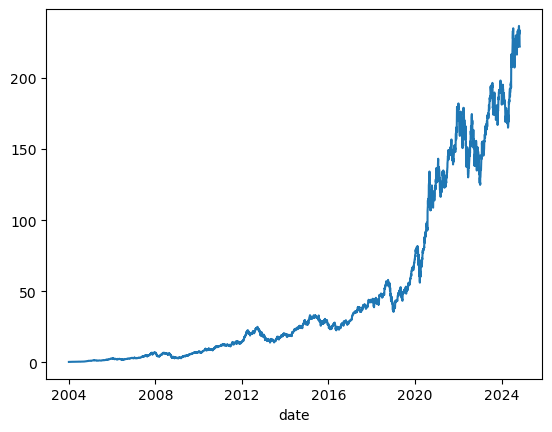

In [5]:
# let's say we want to create a line chart that plots the closing price
df.close.plot()

In [12]:
# we can plot the daily returns as a bar chart using additional styling options
returns = df.close.pct_change()
type(returns)
returns.index

Index([2004-01-02, 2004-01-05, 2004-01-06, 2004-01-07, 2004-01-08, 2004-01-09,
       2004-01-12, 2004-01-13, 2004-01-14, 2004-01-15,
       ...
       2024-10-22, 2024-10-23, 2024-10-24, 2024-10-25, 2024-10-28, 2024-10-29,
       2024-10-30, 2024-10-31, 2024-11-01, 2024-11-04],
      dtype='object', name='date', length=5249)

<Axes: title={'center': 'AAPL returns'}, xlabel='date'>

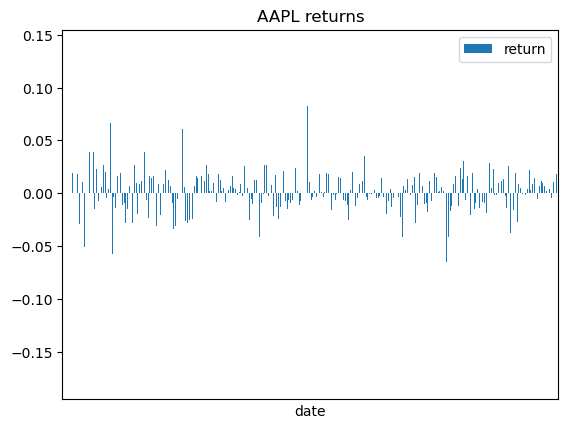

In [13]:
returns.name = "return"
returns.plot.bar(
    title="AAPL returns",
    grid=False,
    legend=True,
    xticks=[])

<Axes: ylabel='Frequency'>

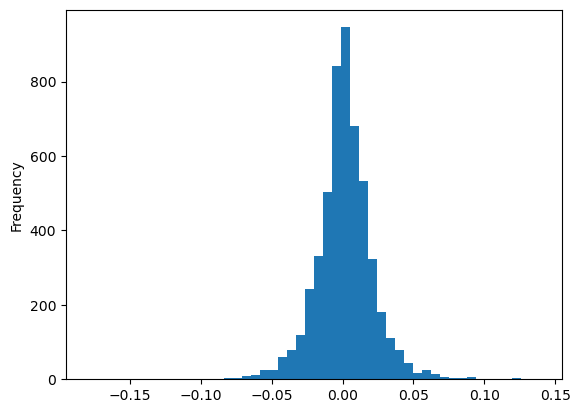

In [14]:
# we can create a histogram of returns with 50 bins
returns.plot.hist(bins=50)

<Axes: >

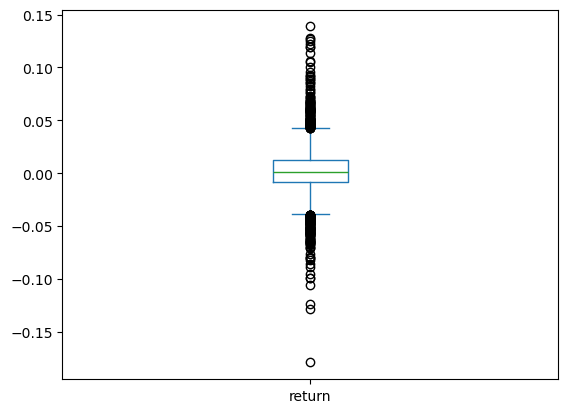

In [16]:
# box-and-whisker plot
returns.plot.box()
# data points beyond whiskers are considered outliers

In [17]:
# The pandas plot method lets you create various types of plots using DataFrames and Series. 
# Under the hood, pandas use the defined backend (Matplotlib by default) to generate these visualizations.

<Axes: xlabel='QQQ', ylabel='AAPL'>

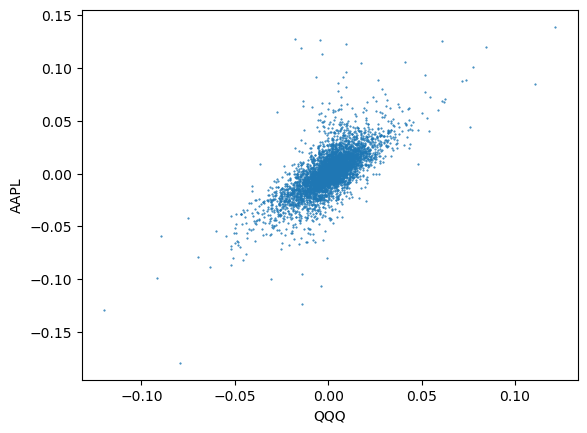

In [18]:
# scatter plots are a type of visual representation that can be used when assessing relationship between two assets
# we want to compare AAPL with the Nasdaq tracking ETF, QQQ
qqq = obb.equity.price.historical("QQQ")
qqq_returns = qqq.close.pct_change()
asset_bench = pd.concat([returns, qqq_returns], axis=1)
asset_bench.columns = ["AAPL", "QQQ"]
asset_bench.plot.scatter(x="QQQ", y="AAPL", s=0.25)

In [19]:
# pandas scatter matrix -> visualizes pairwise relationships. 
# It generates a matrix of scatter plots, each plotting a pair of columns against each other
asset_bench.head()

,AAPL,QQQ
date,,
2004-01-02,NaN,NaN
2004-01-05,0.052632,0.020077
2004-01-06,0.000000,0.006740
2004-01-07,0.025000,0.009106
2004-01-08,0.024390,0.007962


array([[<Axes: xlabel='AAPL', ylabel='AAPL'>,
        <Axes: xlabel='QQQ', ylabel='AAPL'>],
       [<Axes: xlabel='AAPL', ylabel='QQQ'>,
        <Axes: xlabel='QQQ', ylabel='QQQ'>]], dtype=object)

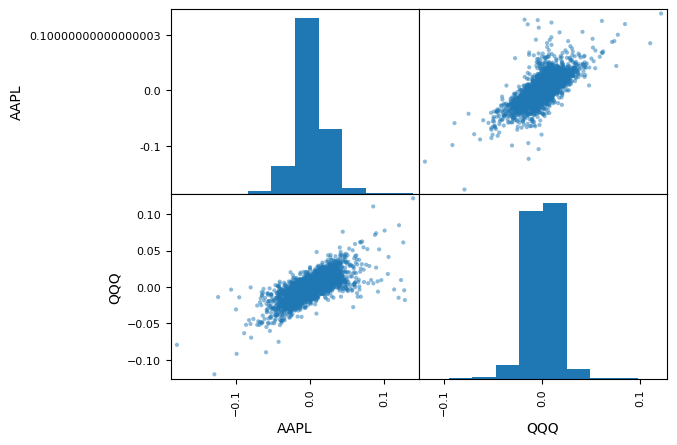

In [21]:
scatter_matrix(asset_bench) # the main diagonal (top left -> bottom right) shows histogram of each column

Bootstrap plots serve to graphically evaluate the variability associated with a particular statistic, including the mean, median, and midrange. A designated subset size is randomly sampled from the data set, and the target statistic is calculated for this subset. This procedure is iteratively performed a predetermined number of times. The plots and histograms collectively form the bootstrap plot.

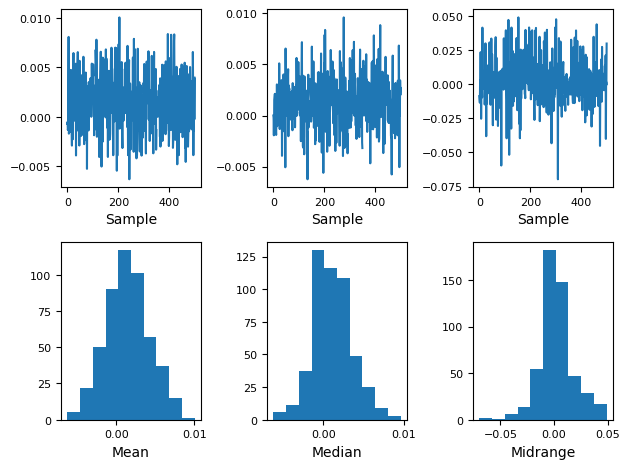

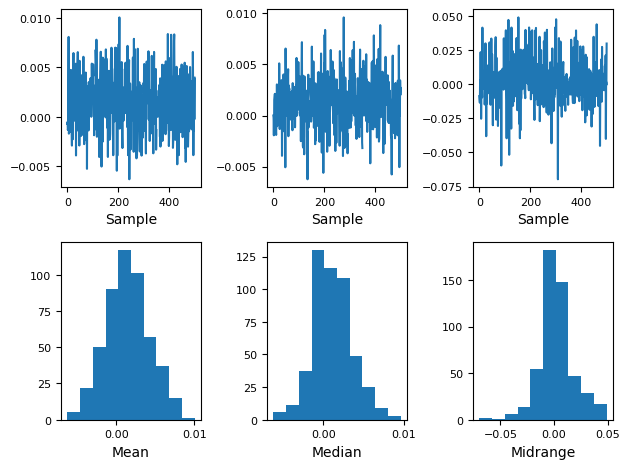

In [22]:
bootstrap_plot(returns)

# Animating the evolution of the yield curve with Matplotlib

The yield curve charts the yields of bonds of the same quality across different maturities, typically slopes upwards. This means that longer term bonds have higher yields than shorter term bonds, which makes sense given the additional risk associated with holding a bond for a longer time (inflation, interest rate volatility). 

It should be noted that there are times when the yield curve inversts, meaning the shorter term maturities yield more than long term ones. Many view inverted yield curve as a precursor to recession.

In [2]:
# Creating an animated plot requires a specialized function called animation which is imported from Matplotlib

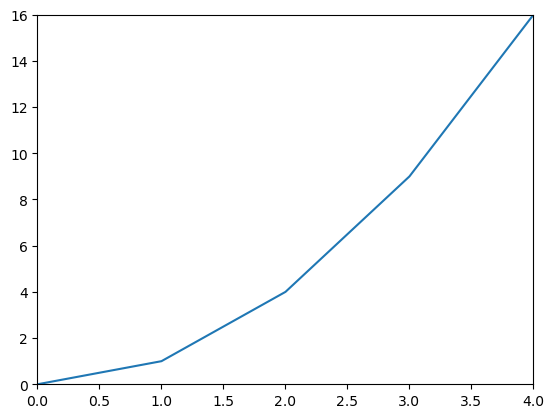

In [14]:
# implementing easier example (without animation for better understanding)
import matplotlib.pyplot as plt

# Step 1: Create a figure and an Axes
fig = plt.figure()            # Create a blank figure (canvas)
ax = fig.add_subplot(1, 1, 1)  # Add a single Axes to this figure (1x1 grid)

# Step 2: Initialize an empty line
line, = ax.plot([], [])        # Create an empty line object on the Axes

# Step 3: Set up the data and update the line
x_data = [0, 1, 2, 3, 4]       # x values
y_data = [0, 1, 4, 9, 16]      # y values (example: y = x^2)
line.set_data(x_data, y_data)  # Update the line with the x and y data

# Step 4: Set the axis limits to fit the data range
ax.set_xlim(0, 4)              # Set x-axis limits to match x_data
ax.set_ylim(0, 16)             # Set y-axis limits to match y_data

# Step 5: Show the plot
plt.show()

In [19]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
from openbb import obb
obb.user.preferences.output_type = "dataframe"

In [34]:
# Creating list of maturities and downloading the data
maturities = ["3m", "6m", "1y", "2y", "3y", "5y", "7y", "10y", "30y"]
data = obb.fixedincome.government.treasury_rates(
    start_date="1985-01-01",
    provider="federal_reserve",
).dropna(how="all").drop(columns=["month_1", "year_20"])
data.columns = maturities
data[maturities] = data[maturities] * 100

In [35]:
data.head()

,3m,6m,1y,2y,3y,5y,7y,10y,30y
date,,,,,,,,,
1985-01-02,8.10,8.62,9.19,10.03,10.61,11.22,11.68,11.70,11.69
1985-01-03,8.07,8.62,9.17,10.06,10.55,11.13,11.54,11.62,11.64
1985-01-04,8.08,8.61,9.17,10.08,10.62,11.19,11.61,11.67,11.70
1985-01-07,8.06,8.51,9.03,10.01,10.50,11.09,11.41,11.50,11.53
1985-01-08,8.06,8.48,9.04,9.99,10.48,11.04,11.36,11.45,11.49


In [36]:
# we can use boolean indexing to mark where the yield curve is inverted
data["inverted"] = data["30y"] < data["3m"]

In [37]:
data.head()

,3m,6m,1y,2y,3y,5y,7y,10y,30y,inverted
date,,,,,,,,,,
1985-01-02,8.10,8.62,9.19,10.03,10.61,11.22,11.68,11.70,11.69,False
1985-01-03,8.07,8.62,9.17,10.06,10.55,11.13,11.54,11.62,11.64,False
1985-01-04,8.08,8.61,9.17,10.08,10.62,11.19,11.61,11.67,11.70,False
1985-01-07,8.06,8.51,9.03,10.01,10.50,11.09,11.41,11.50,11.53,False
1985-01-08,8.06,8.48,9.04,9.99,10.48,11.04,11.36,11.45,11.49,False


<IPython.core.display.Javascript object>


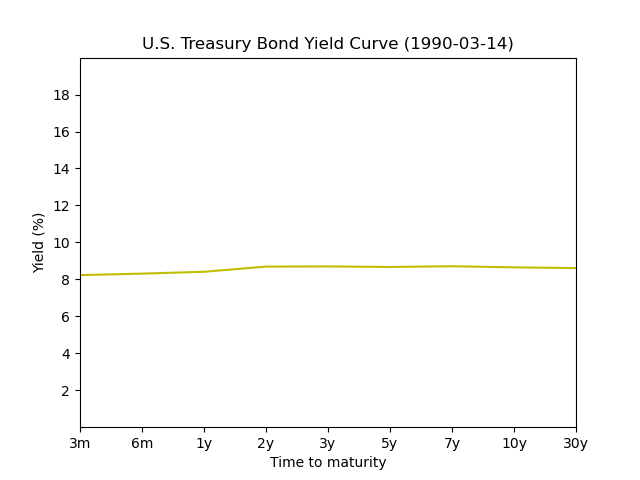

In [38]:
fig = plt.figure() #this is the way to create this white canvas 
ax = fig.add_subplot(1,1,1) #creates a single plot within the figure. We specify 1x1 grid on the first position.
line, = ax.plot([], []) #defines empty line plot on the axis

In [39]:
# set the range of ticks
ax.set_xlim(0, 8)
ax.set_ylim(0, 20)

(0.0, 20.0)

In [40]:
ax.set_xticks(range(9))
ax.set_yticks([2, 4, 6, 8, 10, 12, 14, 16, 18])

In [41]:
ax.set_xticklabels(maturities)
ax.set_yticklabels([2, 4, 6, 8, 10, 12, 14, 16, 18])

[Text(0, 2, '2'),
 Text(0, 4, '4'),
 Text(0, 6, '6'),
 Text(0, 8, '8'),
 Text(0, 10, '10'),
 Text(0, 12, '12'),
 Text(0, 14, '14'),
 Text(0, 16, '16'),
 Text(0, 18, '18')]

In [42]:
ax.yaxis.set_label_position("left")
ax.yaxis.tick_left()

In [43]:
plt.ylabel("Yield (%)")
plt.xlabel("Time to maturity")
plt.title("U.S. Treasury Bond Yield Curve")

Text(0.5, 1.0, 'U.S. Treasury Bond Yield Curve')

In [44]:
# Create the function that is run when the animation is initialized:
def init_func():
    line.set_data([], [])
    return line,

In [45]:
def animate(i):
    x = range(0, len(maturities))
    y = data[maturities].iloc[i]
    dt_ = data.index[i].strftime("%Y-%m-%d")
    if data.inverted.iloc[i]:
            line.set_color("r")
    else:
        line.set_color("y")
    line.set_data(x, y)
    plt.title(f"U.S. Treasury Bond Yield Curve ({dt_})")
    return line,

In [46]:
ani = animation.FuncAnimation(
    fig,
    animate,
    init_func=init_func,
    frames=len(data.index),
    interval=250,
    blit=True
)

In [47]:
plt.show()

# Plotting options implied volatility surfaces with Matplotplib

In [48]:
# this can help us understand how implied volatility of options changes with different expiration dates and strike prices

These surfaces show two main features: skew and term structure. Skew refers to how implied volatility varies at different strike prices for the same expiration date. It can indicate the market’s expectation of significant price shifts. Term structure shows how implied volatility changes for options with the same strike price but different expiration dates. Term structure shows how volatility is expected to evolve over time.

In [50]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from openbb import obb
obb.user.preferences.output_type = "dataframe"

In [51]:
chains = obb.derivatives.options.chains(
    "AAPL",
    provider="cboe",
)

In [52]:
chains.head()

,underlying_symbol,underlying_price,contract_symbol,expiration,dte,strike,option_type,open_interest,volume,theoretical_price,...,low,prev_close,change,change_percent,implied_volatility,delta,gamma,theta,vega,rho
0,AAPL,227.61,AAPL241108C00100000,2024-11-08,1,100.0,call,9,0,127.605,...,0.0,123.574997,0.0,0.0,0.0000,1.0,0.0,-0.1205,0.0,0.0
1,AAPL,227.61,AAPL241108P00100000,2024-11-08,1,100.0,put,51,0,0.000,...,0.0,0.005000,0.0,0.0,4.7132,0.0,0.0,0.0000,0.0,0.0
2,AAPL,227.61,AAPL241108C00105000,2024-11-08,1,105.0,call,0,0,122.605,...,0.0,118.575001,0.0,0.0,0.0000,1.0,0.0,-0.1205,0.0,0.0
3,AAPL,227.61,AAPL241108P00105000,2024-11-08,1,105.0,put,4,0,0.000,...,0.0,0.005000,0.0,0.0,4.4451,0.0,0.0,0.0000,0.0,0.0
4,AAPL,227.61,AAPL241108C00110000,2024-11-08,1,110.0,call,0,0,117.605,...,0.0,113.625000,0.0,0.0,6.0861,1.0,0.0,-0.1205,0.0,0.0


In [55]:
calls = chains[chains.option_type == "call"]
puts = chains[chains.option_type == "put"]

In [56]:
calls = calls[
    (calls.dte < 100)
    & (calls.strike >= 100)
]
calls.drop_duplicates(subset=["strike", "dte"], keep=False,
    inplace=True)

In [57]:
vol_surface = (
    calls
    .pivot(
        index="strike",
        columns="dte",
        values="implied_volatility"
    )
    .dropna(how="all", axis=1)
)

In [58]:
strike, dte = np.meshgrid(
    vol_surface.columns,
    vol_surface.index
)

<IPython.core.display.Javascript object>


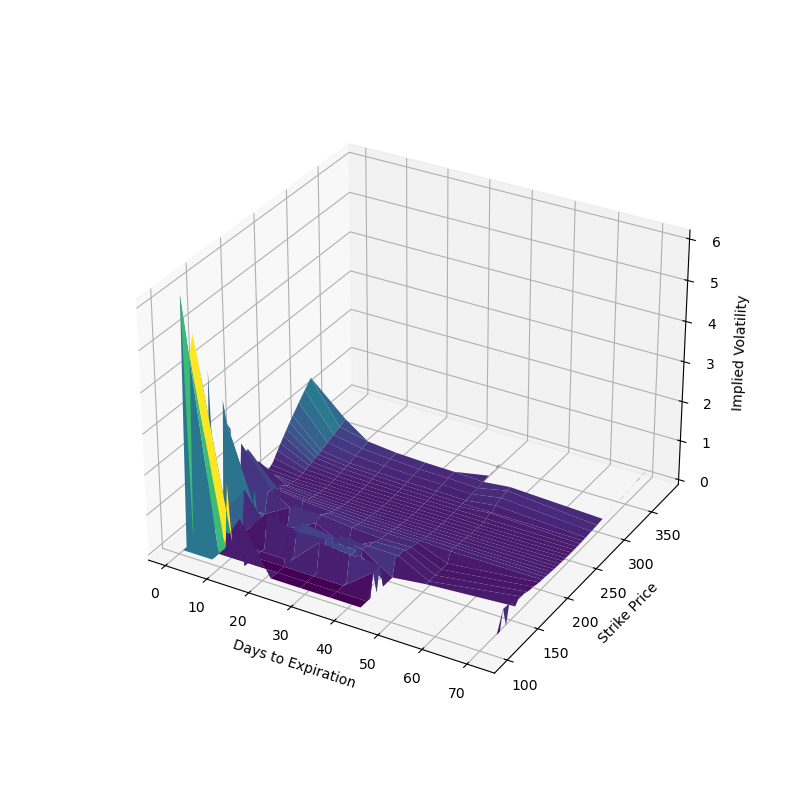

In [61]:
fig1 = plt.figure(figsize=(8, 8))
ax = fig1.add_subplot(111, projection='3d')
ax.set_xlabel("Days to Expiration")
ax.set_ylabel("Strike Price")
ax.set_zlabel("Implied Volatility")
ax.plot_surface(
    strike,
    dte,
    vol_surface.values,
    cmap="viridis"
)

# Visualizing statistical relationships with Seaborn

In [62]:
# seaborn is tailor-made for visualizing statistical relationships, making it extremly important in factor engineering

In [63]:
# Seaborn is built on Matplotlib and integrates with pandas

In [66]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from openbb import obb
obb.user.preferences.output_type = "dataframe"

In [67]:
data = obb.equity.price.historical(
    ["AAPL", "SPY"],
    start_date="2020-01-01").pivot(columns="symbol", values="close")

In [69]:
returns = data.pct_change(fill_method=None).dropna()

In [71]:
type(returns)

pandas.core.frame.DataFrame

In [72]:
returns = returns.reset_index()
returns.head()

In [75]:
melted = pd.melt(
    returns,
    id_vars=["date"],
    var_name="stock",
    value_name="returns",)

In [82]:
melted.head()
melted["date"] = pd.to_datetime(melted["date"])


In [83]:
# we can add a new column for the month
melted["month"] = melted["date"].dt.to_period("M")

<IPython.core.display.Javascript object>


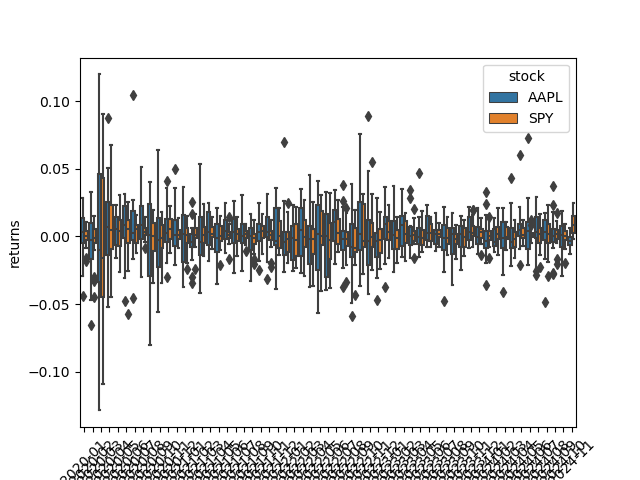

[Text(0, 0, '2020-01'),
 Text(1, 0, '2020-02'),
 Text(2, 0, '2020-03'),
 Text(3, 0, '2020-04'),
 Text(4, 0, '2020-05'),
 Text(5, 0, '2020-06'),
 Text(6, 0, '2020-07'),
 Text(7, 0, '2020-08'),
 Text(8, 0, '2020-09'),
 Text(9, 0, '2020-10'),
 Text(10, 0, '2020-11'),
 Text(11, 0, '2020-12'),
 Text(12, 0, '2021-01'),
 Text(13, 0, '2021-02'),
 Text(14, 0, '2021-03'),
 Text(15, 0, '2021-04'),
 Text(16, 0, '2021-05'),
 Text(17, 0, '2021-06'),
 Text(18, 0, '2021-07'),
 Text(19, 0, '2021-08'),
 Text(20, 0, '2021-09'),
 Text(21, 0, '2021-10'),
 Text(22, 0, '2021-11'),
 Text(23, 0, '2021-12'),
 Text(24, 0, '2022-01'),
 Text(25, 0, '2022-02'),
 Text(26, 0, '2022-03'),
 Text(27, 0, '2022-04'),
 Text(28, 0, '2022-05'),
 Text(29, 0, '2022-06'),
 Text(30, 0, '2022-07'),
 Text(31, 0, '2022-08'),
 Text(32, 0, '2022-09'),
 Text(33, 0, '2022-10'),
 Text(34, 0, '2022-11'),
 Text(35, 0, '2022-12'),
 Text(36, 0, '2023-01'),
 Text(37, 0, '2023-02'),
 Text(38, 0, '2023-03'),
 Text(39, 0, '2023-04'),
 Text(40, 

In [84]:
# now, we can generate the box-plot
g = sns.boxplot(
    x="month",
    y="returns",
    hue="stock",
    data=melted
)

g.set_xticklabels(
    melted["month"].unique(),
    rotation=45)

In [85]:
# Another popular chart type is jointplot which is a combination of a scatter plot and histograms for each variable along the margins. 

<IPython.core.display.Javascript object>


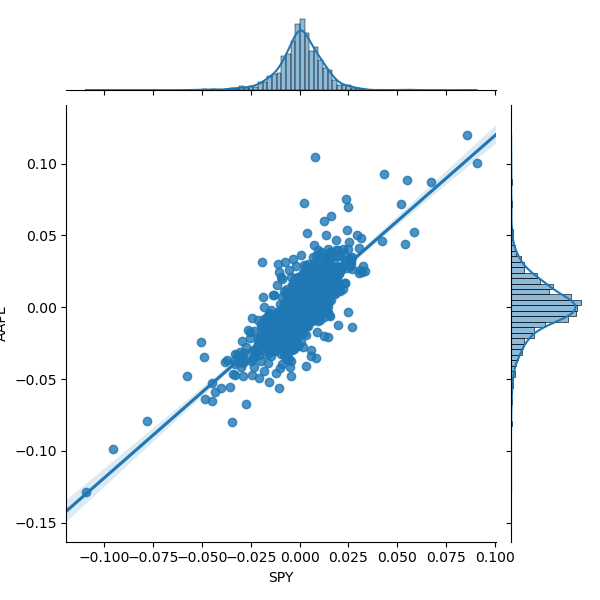

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


In [86]:
g = sns.jointplot(
    x = "SPY",
    y = "AAPL",
    data=returns,
    kind="reg",
    truncate=False,) # "reg" arg passed to kind param, fitted linear regression to our datapoints!

In [87]:
# traders often use correlation matrices to understand the linear relationships between multiple assets simultaneously.

In [88]:
dji = pd.read_html(
    "https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average"
)[1]

In [92]:
dji

,0,1
0,NaN,"This table's ""industry"" column's factual accur..."


In [93]:
url = "https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average"
tables = pd.read_html(url)

In [94]:
type(tables)

list

In [95]:
tables

[                                                   0  \
 0  Historical logarithmic graph of the DJIA from ...   
 1                                         Foundation   
 2                                           Operator   
 3                                          Exchanges   
 4                                     Trading symbol   
 5                                       Constituents   
 6                                               Type   
 7                                         Market cap   
 8                                   Weighting method   
 9                                            Website   
 
                                                    1  
 0  Historical logarithmic graph of the DJIA from ...  
 1  February 16, 1885; 139 years ago (as DJA)[1] M...  
 2                              S&P Dow Jones Indices  
 3                      New York Stock ExchangeNasdaq  
 4                                  ^DJI$INDU.DJIDJIA  
 5                                 